# **Task 1 (20 points): Advanced Objective Function and Use Case**

**1. Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations)**

### **Derive the objective function**
Assume binary labels $y_i \in \{0,1\}$ with $x_i \in \mathbb{R}^d$ and parameter $w_i \in \mathbb{R}^d$.

###Model

$$
p_i \;=\; P(y_i=1 \mid x_i, w) \;=\; \sigma(w^\top x_i) = \frac{1}{1+e^{-w^tx_i}}
$$

Then

$$
P(y_i \mid x_i, w) \;=\; p_i^{y_i}(1-p_i)^{1-y_i}.
$$



### Likelihood
Assuming i.i.d. samples,

$$
L(w)
\;=\;
P(\{y_i\}_{i=1}^n \mid \{x_i\}_{i=1}^n, w)
\;=\;
\prod_{i=1}^n P(y_i \mid x_i, w)
\;=\;
\prod_{i=1}^n p_i^{y_i}(1-p_i)^{1-y_i}.
$$

### Log-likelihood
Taking logs:

$$
\ell(w) = \log L(w)
=
\sum_{i=1}^n \left[y_i\log p_i + (1-y_i)\log(1-p_i)\right],$$ where $p_i=\sigma(w^\top x_i).$

Therefore,
$$
\ell(w)
=
\sum_{i=1}^n
\left[
y_i\log \sigma(w^\top x_i)
+
(1-y_i)\log\left(1-\sigma(w^\top x_i)\right)
\right].
$$

### MLE optimization problem
The MLE chooses

$$
\hat{w}_{\text{MLE}}=\max_w \ell(w).
$$

Equivalently, maximizing the $\ell(w)$ is minimizing the $-\ell(w)$. Therefore, the objective function is:
$$
\min_w
\left(
-\ell(w)
\right)
=
\min_w
\sum_{i=1}^n
\left[
-y_i\log \sigma(w^\top x_i)
-
(1-y_i)\log\left(1-\sigma(w^\top x_i)\right)
\right].
$$

### **MAP technique**
Maximum a Posteriori (MAP) estimation chooses parameters that maximize the posterior[1][2]:
$$
\hat{w}_{\text{MAP}}
=
\arg\max_w p(w\mid D).
$$

By Bayes’ rule:

$$
p(w\mid D) \propto p(D\mid w)\,p(w),
$$

so:

$$
\hat{w}_{\text{MAP}}
=
\arg\max_w \left[\log p(D\mid w)+\log p(w)\right].
$$
Equivalently (minimization form):

$$
\hat{w}_{\text{MAP}}
=
\arg\min_w \left[-\log p(D\mid w) - \log p(w)\right]
$$
MAP with Gaussian prior (L2)
$$
\min_w \sum_{i=1}^n
\left[
-y_i\log \sigma(w^\top x_i)
-
(1-y_i)\log\left(1-\sigma(w^\top x_i)\right)
\right]
+
\lambda \lVert w\rVert_2^2.
$$
### **Key Differences**
1. MLE only uses the likelihood, which may cause overfitting. However, MAP uses likelihood and a prior, which provides regularization and prevent overfitting.
2. If the prior is flat, then $log p(w)$ is a constant, and MAP will be reduced to MLE.
#### Reference
[1]. Cousineau, Denis, and Sebastien Helie. "Improving maximum likelihood estimation using prior probabilities: A tutorial on maximum a posteriori estimation and an examination of the weibull distribution." Tutorials in Quantitative Methods for Psychology 9.2 (2013): 61-71.


[2]. Abbey, Craig K., and Miguel P. Eckstein. "Maximum-likelihood and maximum-a-posteriori estimates of human-observer templates." medical imaging 2001: Image perception and performance. Vol. 4324. SPIE, 2001.

**2. Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class).**

I would like to use Logistic Regreesion to predict whether a patient has a high risk of developing diabetes next year based on features like age, BMI, Blood glucose level, Blood pressure, Family history indicator, Physical activity level.
This is suitable for LR because it's a binary outcome, where the goal is to clasify whether patient has diabetes(1) or not (0). Also, it provides the coefficients that could help us to understand cause of the diabetes. The learned coefficients indicate how each input feature influences the estimated probability of diabetes. Compared with Linear SVM, logistic regression provides probabilistic outputs rather than only hard class labels. Moreover, since both methods are linear classifiers, neither can capture nonlinear relationships between input features and the prediction without additional feature transformations or kernel methods.


3. Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1




Each data point in the dataset corresponds to one observation $(x_i,y_i)$
in the model. The feature vector $x_i$ contains age, BMI, Blood glucose level, Blood pressure, Family history indicator, Physical activity level, while $y_i \in (0,1)$ indicates whether the patient has diabetes. The parameter vector w represents the weights associated with each feature.
In deriving the objective function in Part 1, we assume that the samples are independent and identically distributed and that the outcome follows a Bernoulli distribution. We also assume a linear relationship between the input features and the log-odds of the probability through $w^tx_i$.

# **Task 2 (20 points): Dataset and Advanced EDA**

**Select a publicly available dataset (excluding commonly used datasets such as Titanic,
Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10
features to allow for more complex analysis.**

[Patient Churn Prediction Dataset for Healthcare](https://www.kaggle.com/datasets/nudratabbas/patient-churn-prediction-dataset-for-healthcare) from Kaggle.

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nudratabbas/patient-churn-prediction-dataset-for-healthcare")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'patient-churn-prediction-dataset-for-healthcare' dataset.
Path to dataset files: /kaggle/input/patient-churn-prediction-dataset-for-healthcare


In [23]:
import pandas as pd
import os
df = pd.read_csv(os.path.join(path, "patient_churn_dataset.csv"))
df.head()

PatientID  Age  Gender State  Tenure_Months          Specialty  \
0    C20000   41  Female    PA             62         Pediatrics   
1    C20001   43  Female    GA             44  Internal Medicine   
2    C20002   21    Male    MI            120  Internal Medicine   
3    C20003   65    Male    FL            118   General Practice   
4    C20004   18  Female    CA             70         Cardiology   

  Insurance_Type  Visits_Last_Year  Missed_Appointments  \
0       Medicaid                 1                    0   
1       Self-Pay                 7                    4   
2       Medicaid                15                    5   
3        Private                10                    3   
4       Medicaid                 5                    4   

   Days_Since_Last_Visit  ... Overall_Satisfaction  Wait_Time_Satisfaction  \
0                    564  ...                  3.5                     4.9   
1                    254  ...                  2.6                     3.1   
2                     89  ...                  1.6                     4.4   
3                    135  ...                  2.6                     4.3   
4                    696  ...                  2.2                     4.0   

   Staff_Satisfaction  Provider_Rating  Avg_Out_Of_Pocket_Cost  \
0                 3.8              4.2                     306   
1                 4.7              4.3                    1851   
2                 2.1              4.7                     391   
3                 4.3              4.9                     808   
4                 4.1              4.4                     866   

   Billing_Issues  Portal_Usage  Referrals_Made  Distance_To_Facility_Miles  \
0               0             0               3                        21.4   
1               0             0               0                        47.6   
2               0             0               2                         7.1   
3               0             0               0                        11.6   
4               0             0               0                        10.3   

   Churned  
0        1  
1        1  
2        0  
3        1  
4        1  

[5 rows x 21 columns]

**Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among
features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and
demonstrate steps to handle them.**

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df.select_dtypes(include=["float64", "int64"])

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print(vif_df)
remove_cols = [f for f in vif_df["feature"] if vif_df.loc[vif_df["feature"] == f, "VIF"].values[0] > 10]
df.drop(remove_cols, axis=1)


                       feature        VIF
0                          Age  10.892081
1                Tenure_Months   3.904250
2             Visits_Last_Year   4.077060
3          Missed_Appointments   2.749087
4        Days_Since_Last_Visit   3.903988
5         Overall_Satisfaction  10.401917
6       Wait_Time_Satisfaction  10.700082
7           Staff_Satisfaction  14.232995
8              Provider_Rating  20.154707
9       Avg_Out_Of_Pocket_Cost   3.030333
10              Billing_Issues   1.093964
11                Portal_Usage   1.262133
12              Referrals_Made   2.762694
13  Distance_To_Facility_Miles   4.204617
14                     Churned   3.220012


PatientID  Gender State  Tenure_Months          Specialty Insurance_Type  \
0       C20000  Female    PA             62         Pediatrics       Medicaid   
1       C20001  Female    GA             44  Internal Medicine       Self-Pay   
2       C20002    Male    MI            120  Internal Medicine       Medicaid   
3       C20003    Male    FL            118   General Practice        Private   
4       C20004  Female    CA             70         Cardiology       Medicaid   
...        ...     ...   ...            ...                ...            ...   
1995    C21995    Male    NC             78  Internal Medicine       Medicare   
1996    C21996  Female    GA             69  Internal Medicine        Private   
1997    C21997    Male    NC             91    Family Medicine       Medicare   
1998    C21998  Female    NY              5  Internal Medicine        Private   
1999    C21999  Female    NC             69    Family Medicine        Private   

      Visits_Last_Year  Missed_Appointments  Days_Since_Last_Visit  \
0                    1                    0                    564   
1                    7                    4                    254   
2                   15                    5                     89   
3                   10                    3                    135   
4                    5                    4                    696   
...                ...                  ...                    ...   
1995                 8                    2                    180   
1996                 6                    4                    352   
1997                 9                    4                    494   
1998                 3                    0                    315   
1999                 6                    2                    675   

     Last_Interaction_Date  Avg_Out_Of_Pocket_Cost  Billing_Issues  \
0               2024-07-05                     306               0   
1               2025-05-11                    1851               0   
2               2025-10-23                     391               0   
3               2025-09-07                     808               0   
4               2024-02-24                     866               0   
...                    ...                     ...             ...   
1995            2025-07-24                     268               0   
1996            2025-02-02                    1257               1   
1997            2024-09-13                      50               0   
1998            2025-03-11                     848               0   
1999            2024-03-16                    1310               0   

      Portal_Usage  Referrals_Made  Distance_To_Facility_Miles  Churned  
0                0               3                        21.4        1  
1                0               0                        47.6        1  
2                0               2                         7.1        0  
3                0               0                        11.6        1  
4                0               0                        10.3        1  
...            ...             ...                         ...      ...  
1995             1               0                        42.6        1  
1996             0               3                        15.4        1  
1997             1               3                         2.6        0  
1998             0               1                        38.8        1  
1999             0               1                        48.2        1  

[2000 rows x 16 columns]

**Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced
visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).**

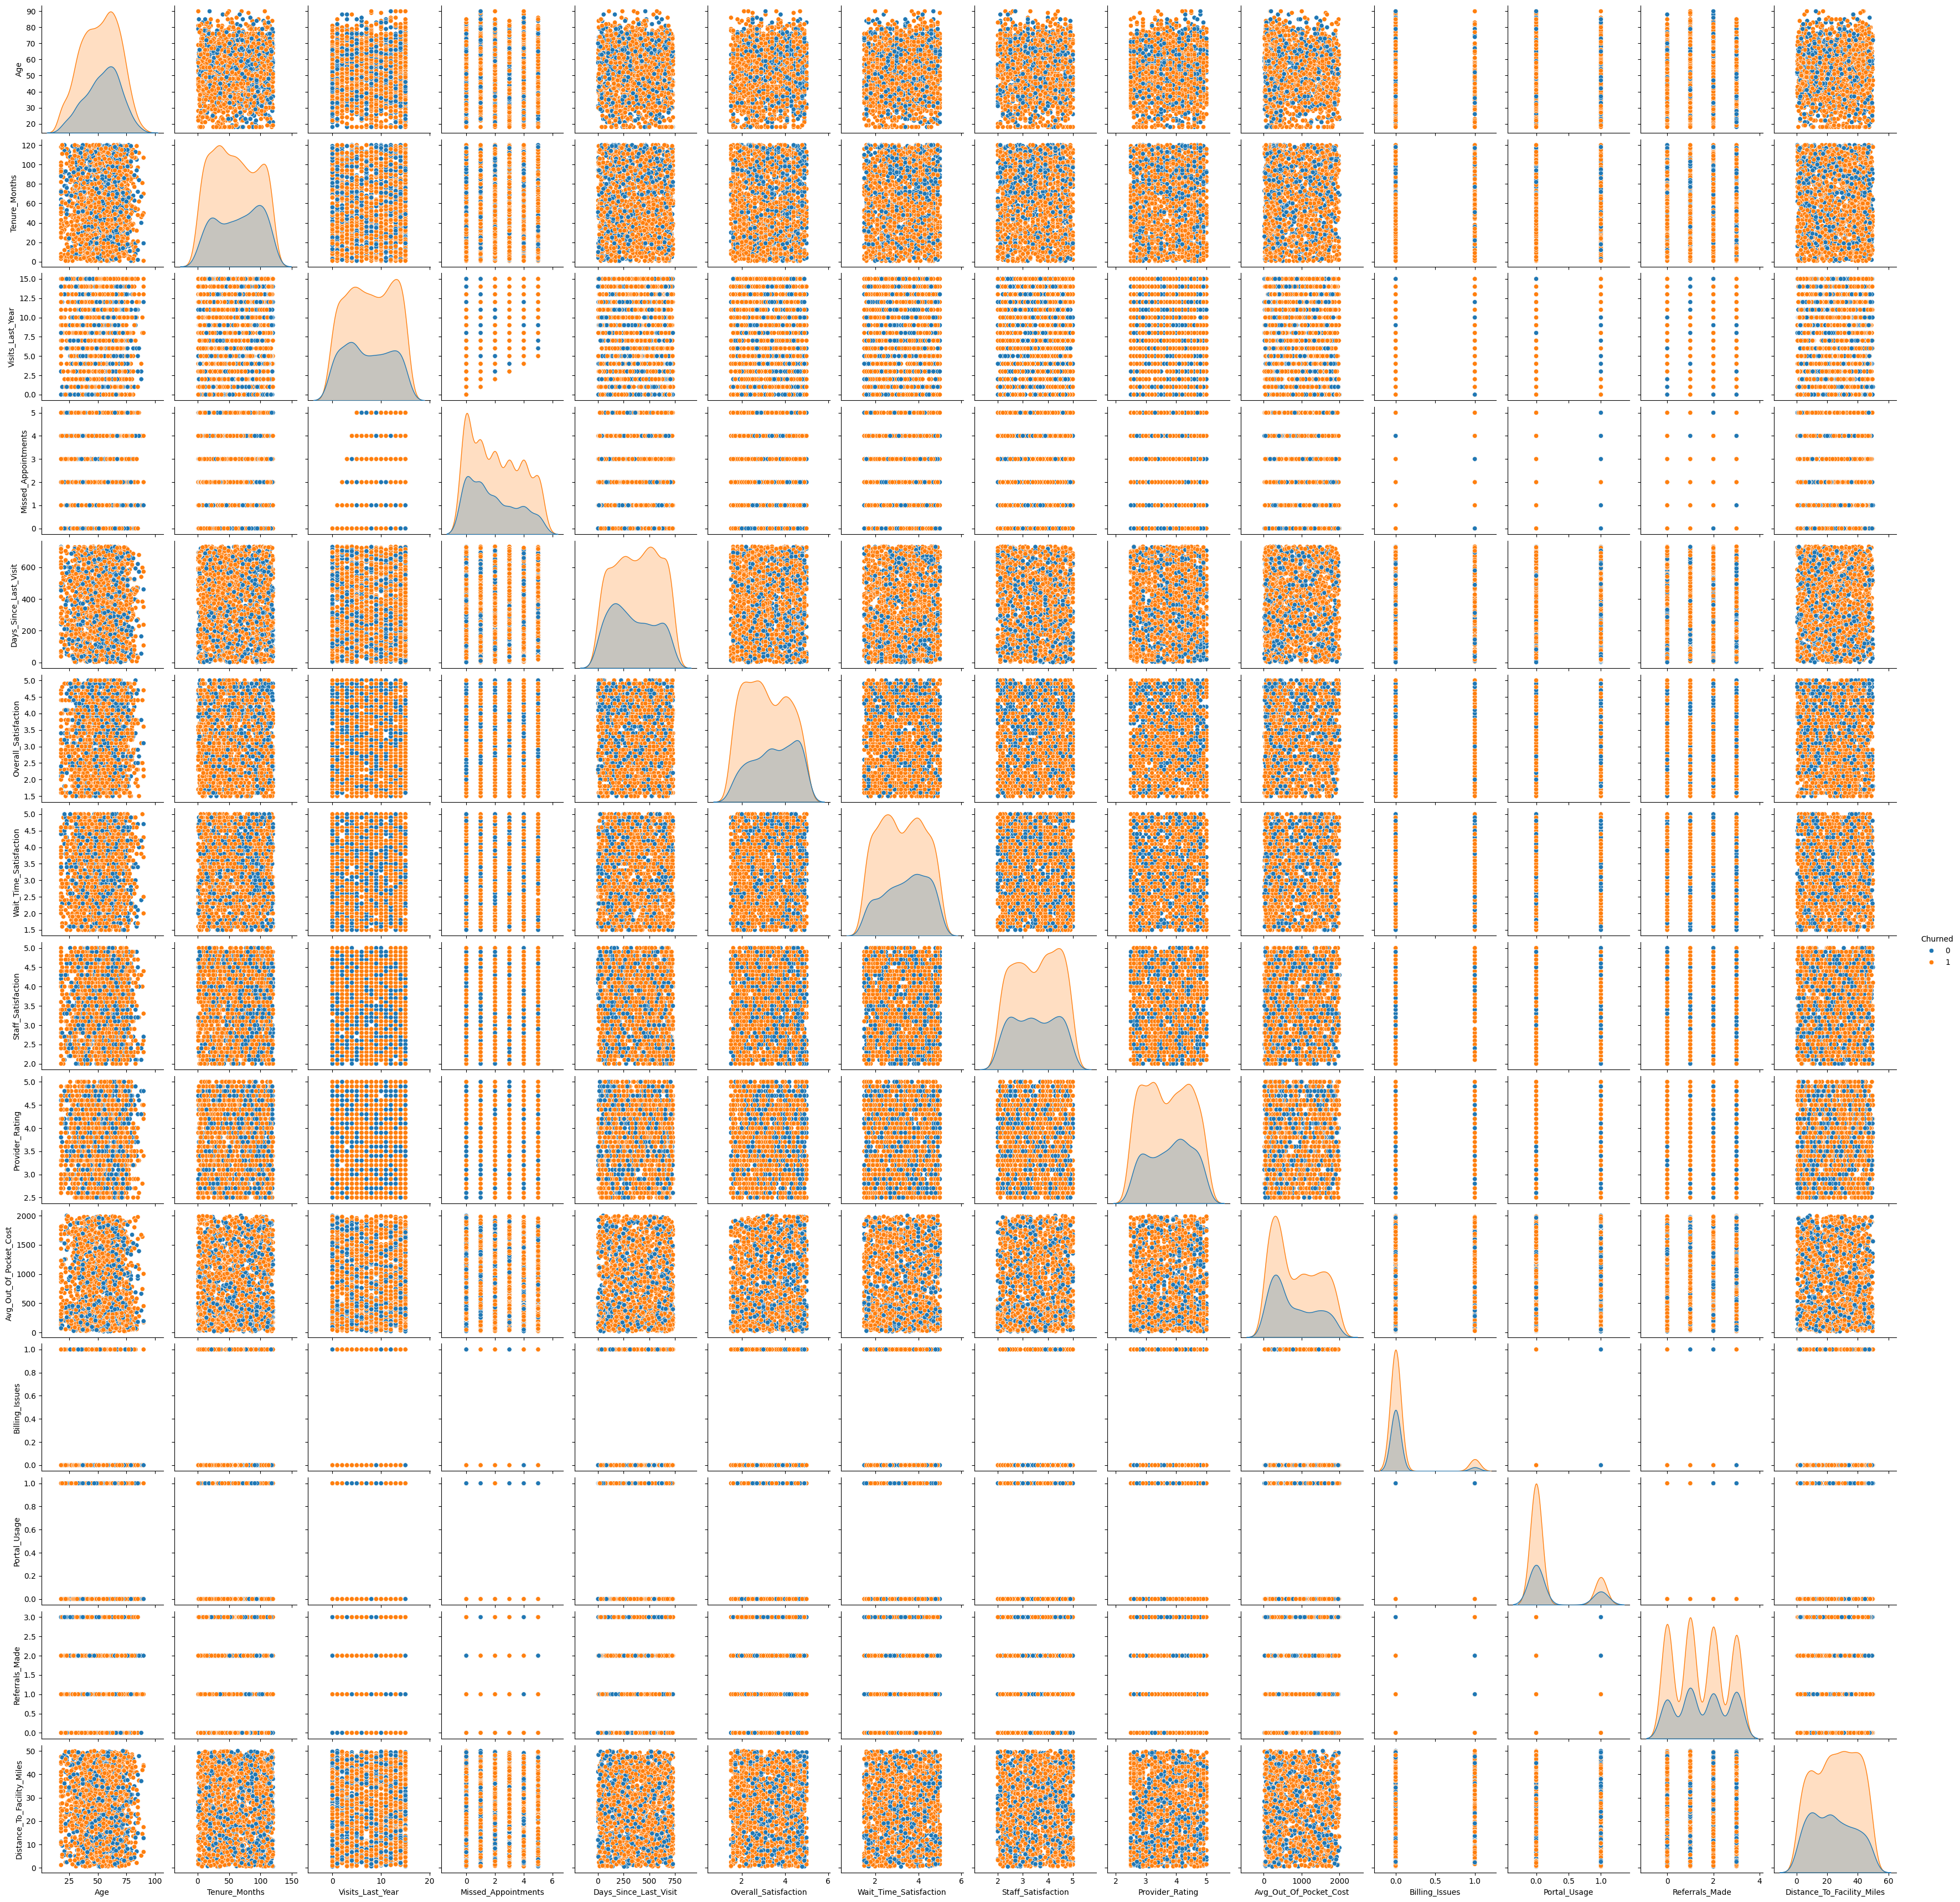

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

label_col = "Churned"

selected_features = df.select_dtypes(
    include=["float64", "int64"]
).columns.drop(label_col)

sns.pairplot(
    df[selected_features.tolist() + ["Churned"]],
    hue="Churned",
    diag_kind="kde")

plt.show()


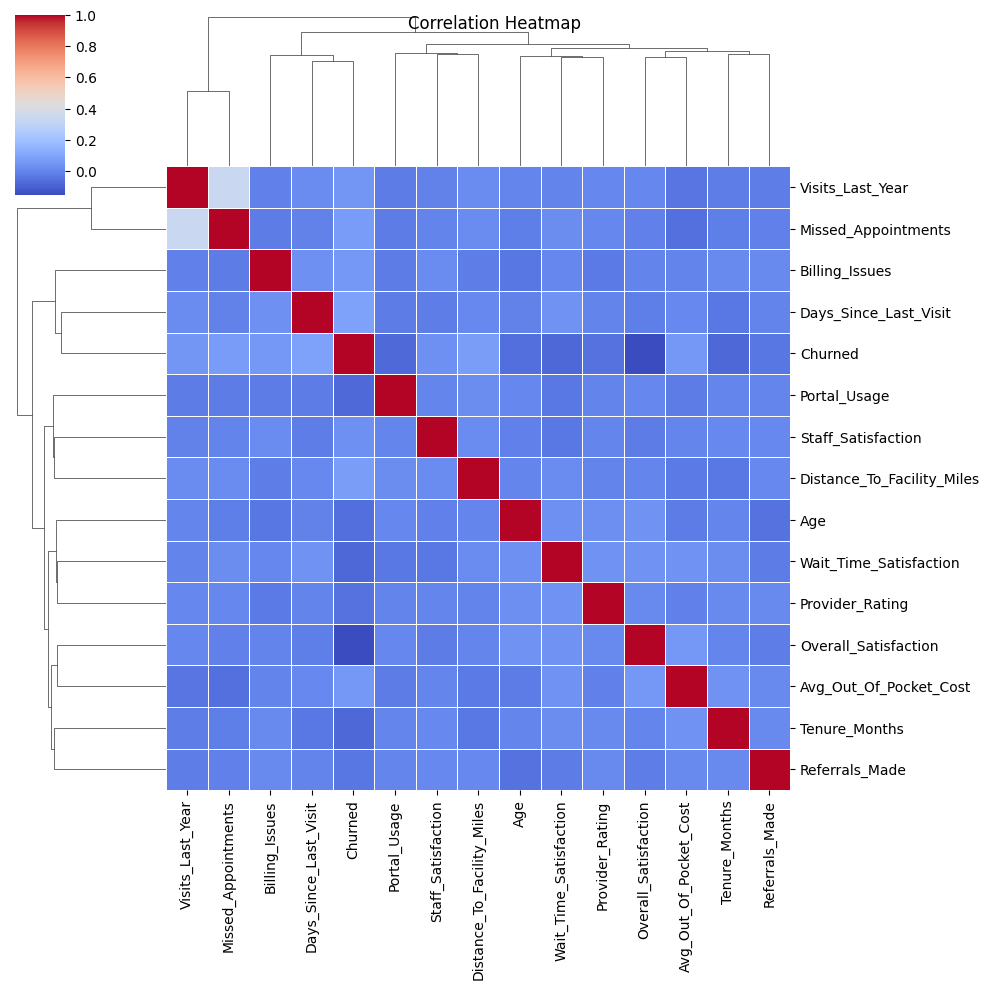

In [37]:
import numpy as np

numeric_df = df.select_dtypes(include=["float64", "int64"])

corr = numeric_df.corr()

sns.clustermap(
    corr,
    cmap="coolwarm",
    linewidths=0.5,
    method="ward"
)

plt.suptitle("Correlation Heatmap")
plt.show()


# **Task 3 (20 points): Logistic Regression Implementation**

**1. Implement Logistic Regression from scratch, including the vectorized implementation of
cost function and gradient descent.**

In [50]:
def sigmoid(z):
    # stable sigmoid
    z = np.clip(z, -50, 50)
    return 1.0 / (1.0 + np.exp(-z))

def loss_and_grad(X, y, w, reg_lambda=0.0, eps=1e-12):

    n = X.shape[0]

    # predictions
    p = sigmoid(X @ w)  # (n,)

    # cost
    p = np.clip(p, eps, 1 - eps)
    nll = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

    # gradient
    grad = (X.T @ (p - y)) / n  # (d,)

    # add L2 penalty if reg_lambda > 0
    if reg_lambda > 0:
        nll += reg_lambda * np.sum(w[1:] ** 2)
        reg_grad = 2 * reg_lambda * w
        reg_grad[0] = 0.0
        grad += reg_grad

    return nll, grad

def gradient_descent(X, y, lr=0.1, iters=2000, reg_lambda=0.0, tol=1e-6, verbose=True):
    n, d = X.shape
    w = np.zeros(d)
    history = []

    for t in range(iters):
        cost, grad = loss_and_grad(X, y, w, reg_lambda=reg_lambda)
        w_new = w - lr * grad
        history.append(cost)

        if verbose and (t % 200 == 0 or t == iters - 1):
            print(f"iter={t:4d}  cost={cost:.6f}  ||grad||={np.linalg.norm(grad):.4e}")

        if np.linalg.norm(w_new - w) < tol:
            w = w_new
            break

        w = w_new

    return w, np.array(history)

def predict_proba(X, w):
    return sigmoid(X @ w)

def predict(X, w, threshold=0.5):
    return (predict_proba(X, w) >= threshold).astype(int)

def accuracy(y_true, y_pred):
    return (y_true.astype(int) == y_pred.astype(int)).mean()

label_col = "Churned"

# Use numeric features only
X_df = df.select_dtypes(include=["int64", "float64"]).copy()

# Separate label and features
y = X_df[label_col].to_numpy().astype(float)
X_df = X_df.drop(columns=[label_col])

# Convert to numpy
X = X_df.to_numpy().astype(float)

y = (y > 0).astype(float)


# Train/test split

def train_test_split_np(X, y, test_size=0.2, seed=42):
    rng = np.random.default_rng(seed)
    n = X.shape[0]
    idx = rng.permutation(n)
    test_n = int(round(n * test_size))
    test_idx = idx[:test_n]
    train_idx = idx[test_n:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train_raw, X_test_raw, y_train, y_test = train_test_split_np(X, y, test_size=0.2, seed=42)

# C) Standardize using TRAIN stats only
mu = X_train_raw.mean(axis=0)
sigma = X_train_raw.std(axis=0)
sigma = np.where(sigma == 0, 1.0, sigma)

X_train_std = (X_train_raw - mu) / sigma
X_test_std  = (X_test_raw  - mu) / sigma


X_train = np.hstack([np.ones((X_train_std.shape[0], 1)), X_train_std])
X_test  = np.hstack([np.ones((X_test_std.shape[0], 1)), X_test_std])
w, loss_hist = gradient_descent(
    X_train, y_train,
    lr=0.05,
    iters=2000,
    verbose=True
)
y_pred_train = predict(X_train, w)
y_pred_test  = predict(X_test, w)

print("Train accuracy:", accuracy(y_train, y_pred_train))
print("Test  accuracy:", accuracy(y_test,  y_pred_test))
print("Final training loss:", loss_hist[-1])
print("Weight vector shape:", w.shape)
print("Number of features (incl. intercept):", X_train.shape[1])


iter=   0  cost=0.693147  ||grad||=2.2271e-01
iter= 200  cost=0.590662  ||grad||=2.6164e-02
iter= 400  cost=0.588744  ||grad||=4.8835e-03
iter= 600  cost=0.588671  ||grad||=1.0212e-03
iter= 800  cost=0.588668  ||grad||=2.2250e-04
iter=1000  cost=0.588668  ||grad||=4.9828e-05
Train accuracy: 0.689375
Test  accuracy: 0.6975
Final training loss: 0.5886679067276503
Weight vector shape: (15,)
Number of features (incl. intercept): 15


**2. Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function. (Refer to the research paper discussed in class; you may add additional research too).**

After correcting the train–test split and standardizing the features using statistics computed from the training set, the optimization became stable. Batch gradient descent shows smooth and fast convergence since it uses the full gradient of the logistic loss. Stochastic gradient descent converges more slowly and with more variability due to noisy updates, while mini-batch gradient descent provides a balance between stability and efficiency. Overall, the observed behaviors are consistent with the theoretical convergence properties of gradient-based methods for convex objectives.

In [51]:
import numpy as np

def sigmoid(z):
    z = np.clip(z, -50, 50)
    return 1.0 / (1.0 + np.exp(-z))

def loss_grad(X, y, w, eps=1e-12):
    n = X.shape[0]
    p = sigmoid(X @ w)
    p = np.clip(p, eps, 1 - eps)
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    grad = (X.T @ (p - y)) / n
    return loss, grad


def batch_gd(X, y, lr=0.1, iters=2000, tol=1e-6, verbose=True):
    w = np.zeros(X.shape[1])
    hist = []

    for t in range(iters):
        loss, grad = loss_grad(X, y, w)
        hist.append(loss)

        if verbose and (t % 200 == 0 or t == iters - 1):
            print(f"[BatchGD] iter={t:4d} loss={loss:.6f} ||grad||={np.linalg.norm(grad):.3e}")

        if t > 0 and abs(hist[-2] - hist[-1]) < tol:
            break

        w -= lr * grad

    return w, np.array(hist)

def sgd(X, y, lr0=0.05, iters=5, seed=42, verbose=True):
    rng = np.random.default_rng(seed)
    n, d = X.shape
    w = np.zeros(d)
    hist = []

    for epoch in range(iters):
        lr = lr0 / np.sqrt(1 + epoch)
        for j in rng.permutation(n):
            xi = X[j]         # (d,)
            yi = y[j]         # scalar
            p = sigmoid(xi @ w)
            w -= lr * (p - yi) * xi

        loss, _ = loss_grad(X, y, w)
        hist.append(loss)
        if verbose:
            print(f"[SGD] epoch={epoch:3d} loss={loss:.6f}")

    return w, np.array(hist)


def minibatch_gd(X, y, batch_size=64, lr0=0.05, iters=20, seed=42, verbose=True):

    rng = np.random.default_rng(seed)
    n, d = X.shape
    w = np.zeros(d)
    hist = []

    for epoch in range(iters):
        idx = rng.permutation(n)
        lr = lr0 / np.sqrt(1 + epoch)

        for start in range(0, n, batch_size):
            batch_idx = idx[start:start + batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]

            loss_b, grad_b = loss_grad(Xb, yb, w)  # gradient on mini-batch
            w -= lr * grad_b

        loss_full, _ = loss_grad(X, y, w)
        hist.append(loss_full)
        if verbose and (epoch % 5 == 0 or epoch == iters - 1):
            print(f"[MiniBatchGD] epoch={epoch:3d} loss={loss_full:.6f}")

    return w, np.array(hist)
w_b, hist_b = batch_gd(X_train, y_train, lr=0.1, iters=2000, verbose=True)
w_s, hist_s = sgd(X_train, y_train, lr0=0.05, iters=10, verbose=True)
w_m, hist_m = minibatch_gd(X_train, y_train, batch_size=64, lr0=0.05, iters=30, verbose=True)



[BatchGD] iter=   0 loss=0.693147 ||grad||=2.227e-01
[BatchGD] iter= 200 loss=0.588742 ||grad||=4.810e-03
[SGD] epoch=  0 loss=0.627611
[SGD] epoch=  1 loss=0.609624
[SGD] epoch=  2 loss=0.603823
[SGD] epoch=  3 loss=0.605485
[SGD] epoch=  4 loss=0.598729
[SGD] epoch=  5 loss=0.591842
[SGD] epoch=  6 loss=0.593220
[SGD] epoch=  7 loss=0.604899
[SGD] epoch=  8 loss=0.597615
[SGD] epoch=  9 loss=0.595347
[MiniBatchGD] epoch=  0 loss=0.646899
[MiniBatchGD] epoch=  5 loss=0.603212
[MiniBatchGD] epoch= 10 loss=0.595219
[MiniBatchGD] epoch= 15 loss=0.592247
[MiniBatchGD] epoch= 20 loss=0.590834
[MiniBatchGD] epoch= 25 loss=0.590069
[MiniBatchGD] epoch= 29 loss=0.589690


# **Task 4 (40 points): Optimization Techniques and Advanced Comparison**

**1. Implement or use packages to incorporate any three optimization algorithms (e.g.,
Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic
gradient descent implementation from Task 3.
2. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze
and interpret results for each algorithm.
3. Perform a hyperparameter tuning process (manual or automated using grid
search/random search) for each optimization algorithm and assess its impact on
performance. If you have to do some research for these techniques, please cite your
sources.
4. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets**

Note: I combined codes for all tasks together, same as the summarize.

In this task, I compared Momentum SGD, RMSProp, and Adam with the vanilla SGD implementation from Task 3 using the same logistic regression model. All three methods showed improved performance over vanilla SGD after hyperparameter tuning.

Using multiple evaluation metrics (accuracy, precision, recall, and F1 score), RMSProp achieved the best overall performance on both the validation and test sets, with the highest F1 score. Adam performed similarly but slightly worse, while Momentum SGD had the lowest F1 among the three. All methods achieved high recall, indicating good detection of positive samples, while precision was relatively lower, making F1 a more informative metric.

Hyperparameter tuning had a clear impact on performance. Different optimizers required different learning rates to perform well, and using default settings generally resulted in worse outcomes.

In practice, Momentum SGD is simple but sensitive to hyperparameter choices. RMSProp and Adam converge faster and are more stable, making them more suitable for larger datasets, while vanilla SGD remains easier to interpret and implement.

In [69]:
!pip3 install scikeras

In [68]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# split train -> train/val
X_tr, X_va, y_tr, y_va = train_test_split(
    X_train_std, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


# logistic regression
def build_lr(d):
    model = Sequential()
    model.add(Dense(1, input_shape=(d,), activation=None))
    return model


def get_optimizer(name, p):
    lr = p.get("lr", 0.01)

    if name == "momentum":
        return SGD(learning_rate=lr, momentum=p.get("momentum", 0.9))

    if name == "rmsprop":
        return RMSprop(
            learning_rate=lr,
            rho=p.get("rho", 0.9),
            epsilon=p.get("eps", 1e-8),
        )

    if name == "adam":
        return Adam(
            learning_rate=lr,
            beta_1=p.get("b1", 0.9),
            beta_2=p.get("b2", 0.999),
            epsilon=p.get("eps", 1e-8),
        )

    raise ValueError("unknown optimizer: " + str(name))


def eval_metrics(y_true, y_pred):
    return {
        "acc": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
    }


def train_and_eval(opt_name, params, X_train, y_train, X_eval, y_eval,
                   epochs=30, batch_size=32, seed=42):
    tf.keras.utils.set_random_seed(seed)

    model = build_lr(X_train.shape[1])
    opt = get_optimizer(opt_name, params)

    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    )

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    logits = model.predict(X_eval, verbose=0).reshape(-1)
    probs = tf.sigmoid(logits).numpy()
    y_pred = (probs >= 0.5).astype(int)

    return eval_metrics(y_eval, y_pred)


# small grids
grid = {
    "momentum": [
        {"lr": 0.01, "momentum": 0.9}, {"lr": 0.05, "momentum": 0.9},
    ],
    "rmsprop": [
        {"lr": 0.001, "rho": 0.9}, {"lr": 0.01, "rho": 0.95},
    ],
    "adam": [
        {"lr": 0.001, "b1": 0.9, "b2": 0.999}, {"lr": 0.01, "b1": 0.9, "b2": 0.999},
    ],
}


# tune on validation by F1
best_params = {}
best_val_scores = {}

print("Tuning on VAL (metric = F1)\n")

for opt_name, candidates in grid.items():
    best_f1 = -1.0
    best_p = None
    best_m = None

    for p in candidates:
        m = train_and_eval(opt_name, p, X_tr, y_tr, X_va, y_va, epochs=30)
        if m["f1"] > best_f1:
            best_f1 = m["f1"]
            best_p = p
            best_m = m

    best_params[opt_name] = best_p
    best_val_scores[opt_name] = best_m

    print(f"{opt_name:9s} best={best_p}  val_metrics={best_m}")


# retrain on train+val once, then evaluate on test
X_full = np.vstack([X_tr, X_va])
y_full = np.concatenate([y_tr, y_va])

print("\nFinal evaluation on TEST \n")
final_test_scores = {}

for opt_name, p in best_params.items():
    m = train_and_eval(opt_name, p, X_full, y_full, X_test_std, y_test, epochs=30)
    final_test_scores[opt_name] = m
    print(f"{opt_name:9s} best={p}  test_metrics={m}")


Tuning on VAL (metric = F1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


momentum  best={'lr': 0.05, 'momentum': 0.9}  val_metrics={'acc': 0.69375, 'precision': 0.7006578947368421, 'recall': 0.9681818181818181, 'f1': 0.8129770992366412}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


rmsprop   best={'lr': 0.001, 'rho': 0.9}  val_metrics={'acc': 0.70625, 'precision': 0.7058823529411765, 'recall': 0.9818181818181818, 'f1': 0.8212927756653993}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


adam      best={'lr': 0.001, 'b1': 0.9, 'b2': 0.999}  val_metrics={'acc': 0.70625, 'precision': 0.7072368421052632, 'recall': 0.9772727272727273, 'f1': 0.8206106870229007}

Final evaluation on TEST 



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


momentum  best={'lr': 0.05, 'momentum': 0.9}  test_metrics={'acc': 0.685, 'precision': 0.6916890080428955, 'recall': 0.9591078066914498, 'f1': 0.8037383177570093}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


rmsprop   best={'lr': 0.001, 'rho': 0.9}  test_metrics={'acc': 0.6925, 'precision': 0.6921052631578948, 'recall': 0.9776951672862454, 'f1': 0.810477657935285}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


adam      best={'lr': 0.001, 'b1': 0.9, 'b2': 0.999}  test_metrics={'acc': 0.6875, 'precision': 0.6904761904761905, 'recall': 0.9702602230483272, 'f1': 0.8068006182380216}
